### Overfitting and Underfitting

Overfitting occurs when a model is too complex and starts memorizing the training data rather than learning general patterns. For instance, fitting a very high-degree polynomial to a simple trend may result in the model perfectly predicting the training points but performing poorly on new data, since it has learned the noise rather than the signal.

Underfitting happens when a model is too simple to capture the underlying structure of the data. For example, trying to fit a straight line (linear regression) to data that clearly follows a curved quadratic pattern will result in systematic errors. The model performs poorly both on the training data and on unseen test data.

In practice, a good model lies between these extremes: it is complex enough to capture the important relationships in the data, but not so complex that it loses its ability to generalise effectively.


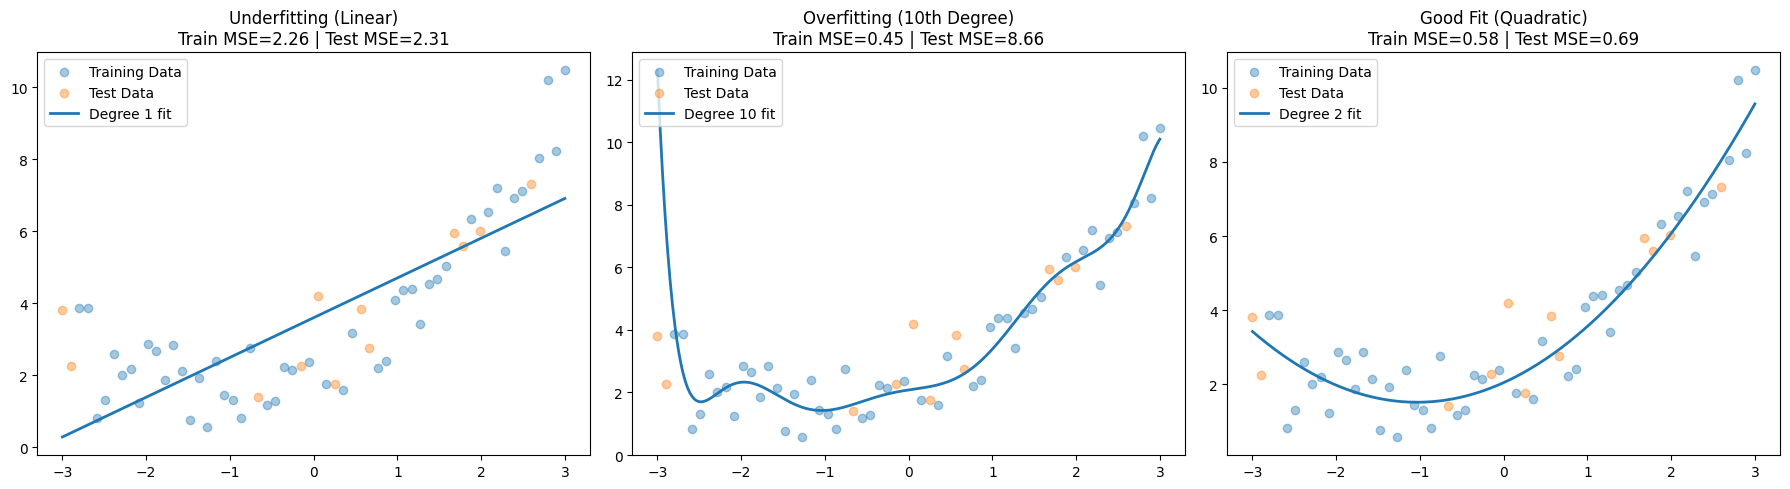

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# --- Synthetic dataset (true function is quadratic) ---
rng = np.random.default_rng(42)
X = np.linspace(-3, 3, 60).reshape(-1, 1)
eps = rng.normal(0, 1.0, size=X.shape)
y = 0.5 * X**2 + X + 2 + eps

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

def fit_poly(Xtr, ytr, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    Xtr_poly = poly.fit_transform(Xtr)
    model = LinearRegression().fit(Xtr_poly, ytr)
    return model, poly

def eval_model(model, poly, Xtr, ytr, Xte, yte):
    ytr_hat = model.predict(poly.transform(Xtr))
    yte_hat = model.predict(poly.transform(Xte))
    return mean_squared_error(ytr, ytr_hat), mean_squared_error(yte, yte_hat)

# Degrees to visualize
degrees = [1, 10, 2]
titles = ["Underfitting (Linear)", "Overfitting (10th Degree)", "Good Fit (Quadratic)"]

# Smooth grid for plotting predictions
X_plot = np.linspace(-3, 3, 400).reshape(-1, 1)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, d, title in zip(axes, degrees, titles):
    model, poly = fit_poly(X_train, y_train, d)
    y_plot = model.predict(poly.transform(X_plot))
    tr_mse, te_mse = eval_model(model, poly, X_train, y_train, X_test, y_test)
    
    ax.scatter(X_train, y_train, alpha=0.4, label="Training Data")
    ax.scatter(X_test, y_test, alpha=0.4, label="Test Data")
    ax.plot(X_plot, y_plot, linewidth=2, label=f"Degree {d} fit")
    ax.set_title(f"{title}\nTrain MSE={tr_mse:.2f} | Test MSE={te_mse:.2f}")
    ax.legend(loc="upper left")

plt.tight_layout()
plt.show()


### Bias Variance Trade-off

A model that closely matches the training data is described as having low bias. While low bias may seem desirable, it is not always beneficial, as it can indicate overfitting. Overfitting will likely result in poor predictions and this situation is associated with high variance.

On the other hand, an underfit model is described as having high bias and it will usually also experience high variance since it fails to properly capture the relaitonships in the underlying data. 

Bias and variance are often described as a trade-off: reducing bias (by making the model more complex) can increase variance, while reducing variance (by simplifying the model) can increase bias. Good modeling aims to strike a balance between the two, achieving a level of complexity that generalizes well to new data.

The illustration below shows examples of high vs. low bias and variance in the context of a dartboard:
- High Bias, Low Variance (Underfitting): Consistently far from the center (bias), but small grouping (variance)
- Low Bias, High Variance (Overfitting): Centered around the target (low bias), but widely spread out (high variance)
- High Bias, High Variance: Far from the center (high bias) and widely scattered (high variance)
- Low Bias, Low Variance (Ideal): Close to the center (low bias) with a tight grouping (low variance).



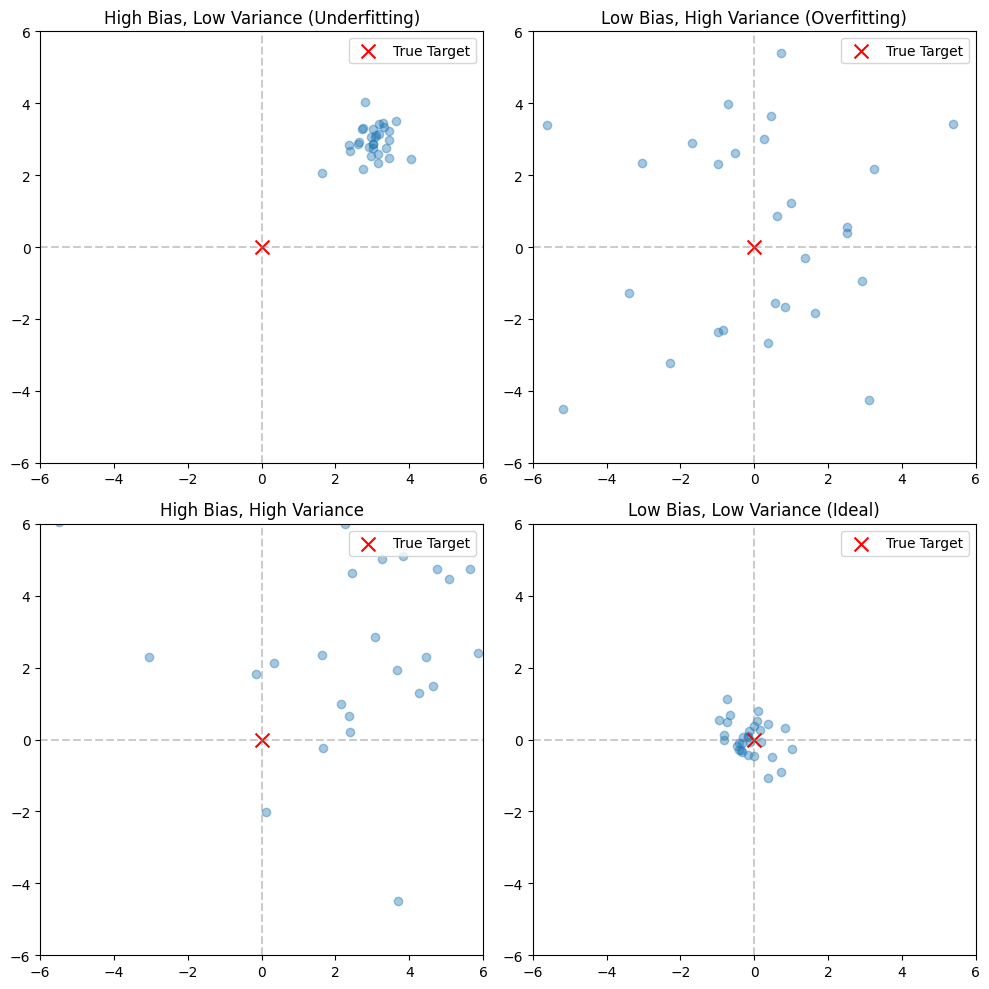

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Function to simulate "predictions" on a dartboard
def generate_points(center, spread, n=30, seed=None):
    rng = np.random.default_rng(seed)
    return center + rng.normal(0, spread, (n, 2))

# Setup the dartboard (true target = center)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

examples = {
    "High Bias, Low Variance (Underfitting)": {"center": [3, 3], "spread": 0.5, "seed": 1},
    "Low Bias, High Variance (Overfitting)": {"center": [0, 0], "spread": 3, "seed": 2},
    "High Bias, High Variance": {"center": [3, 3], "spread": 3, "seed": 3},
    "Low Bias, Low Variance (Ideal)": {"center": [0, 0], "spread": 0.5, "seed": 4},
}

for ax, (title, params) in zip(axes.flatten(), examples.items()):
    points = generate_points(np.array(params["center"]), params["spread"], seed=params["seed"])
    ax.scatter(points[:, 0], points[:, 1], alpha=0.4)
    ax.scatter(0, 0, c="red", s=100, marker="x", label="True Target")  # true center
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.axhline(0, color="gray", linestyle="--", alpha=0.4)
    ax.axvline(0, color="gray", linestyle="--", alpha=0.4)
    ax.set_title(title)
    ax.legend()

plt.tight_layout()
plt.show()
